In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environmental-sound-classification-50/utils2.py
/kaggle/input/environmental-sound-classification-50/esc50.csv
/kaggle/input/environmental-sound-classification-50/bc_utils.py
/kaggle/input/environmental-sound-classification-50/utils.py
/kaggle/input/environmental-sound-classification-50/audio/audio/5-257349-A-15.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/5-195557-A-19.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/2-122820-B-36.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/1-115920-A-22.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/1-172649-C-40.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/2-50668-A-41.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/3-119120-E-48.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/1-223162-A-25.wav
/kaggle/input/environmental-sound-classification-50/audio/audio/3-119459-A-26.wav
/kaggle/input/

In [3]:
CSV_FILE_PATH = "../input/environmental-sound-classification-50/esc50.csv" 
DATA_PATH = "../input/environmental-sound-classification-50/audio/audio/44100/" 
df = pd.read_csv(CSV_FILE_PATH)
df.head()
print("shape of df: ", df.shape)
df.head()

shape of df:  (2000, 7)


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [4]:
classes = df['category'].unique()
print("Classes- ",classes)

Classes-  ['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']


In [5]:
class_dict = {i:x for x,i in enumerate(classes)}
df['target'] = df['category'].map(class_dict)
df=df.drop(['fold','esc10','src_file','take'], axis=1)
df.head()

,filename,target,category
0,1-100032-A-0.wav,0,dog
1,1-100038-A-14.wav,1,chirping_birds
2,1-100210-A-36.wav,2,vacuum_cleaner
3,1-100210-B-36.wav,2,vacuum_cleaner
4,1-101296-A-19.wav,3,thunderstorm


In [6]:
import librosa
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tqdm as tqdm
X = []
y = []
for index, row in df.iterrows():
    sig, sr = librosa.load(DATA_PATH + row[0])
    mfcc_ = librosa.feature.mfcc(y=sig, sr=sr, n_mfcc=40)
    X.append(mfcc_)
    y.append(row[1])
    
X = np.array(X) 
y = np.array(y)
X.shape


2024-06-03 19:01:07.661825: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 19:01:07.662013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 19:01:07.862856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_33/2499267625.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sig, sr = librosa.load(DATA_PATH + row[0])
/tmp/ipykernel_33/2499267625.py:11: FutureWarning: Se

(2000, 40, 216)

In [7]:
 y = tf.keras.utils.to_categorical(y , num_classes=50)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
y.shape

(2000, 50)

In [8]:
print( X.shape)
print( y.shape)
INPUTSHAPE = (40,216,1)

INPUTSHAPE

(2000, 40, 216, 1)
(2000, 50)


(40, 216, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

In [10]:
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)
y_train.shape

(1600, 50)

In [12]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='valid', input_shape=INPUTSHAPE),
    layers.MaxPooling2D(2, padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(50, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 38, 214, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 19, 107, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 17, 105, 128)   │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 53, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 53, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 51, 128)     │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 26, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 26, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,594 (1.06 MB)

 Trainable params: 276,594 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train,y_train ,
            validation_data=(X_test,y_test),
            epochs=15)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 376ms/step - accuracy: 0.7469 - loss: 0.8713 - val_accuracy: 0.5225 - val_loss: 1.9185
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 378ms/step - accuracy: 0.7387 - loss: 0.8435 - val_accuracy: 0.4675 - val_loss: 2.1069
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step - accuracy: 0.7181 - loss: 0.9358 - val_accuracy: 0.5500 - val_loss: 1.8937
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 387ms/step - accuracy: 0.7578 - loss: 0.7621 - val_accuracy: 0.5400 - val_loss: 1.9392
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - accuracy: 0.7354 - loss: 0.7754 - val_accuracy: 0.5050 - val_loss: 2.0040
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.7813 - loss: 0.7339 - val_accuracy: 0.5600 - val_loss: 1.8549
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.7801 - loss: 0.7072 - val_accuracy: 0.5275 - val_loss: 1.9707
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step - accuracy: 0.7644 - loss: 0.6961 - val_accu

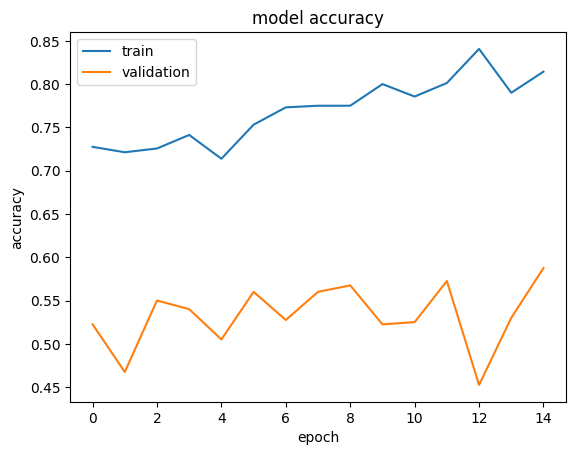

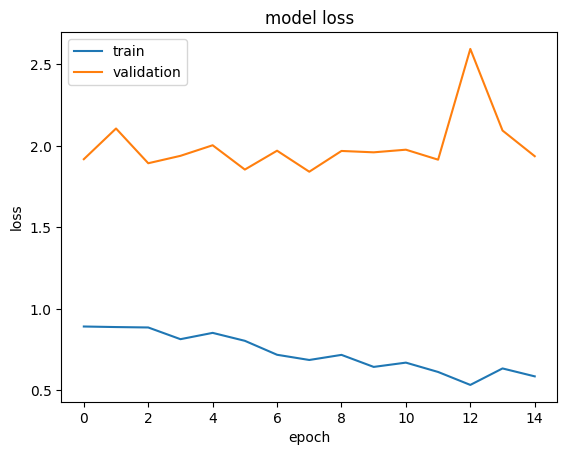

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()